<a href="https://colab.research.google.com/github/lucapqg/Machine-learning/blob/main/spotify_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

O Spotify é um serviço de *streaming* de áudio, que está disponível em 177 países nas mais diversas plataformas. Essa empresa tem por objetivo unir produtores e consumidores de músicas e podcasts, em uma plataforma eficiente, simples e prazerosa de utilizar. 
Ao final de 2019, o Spotify contava com mais de 250 milhões de usuários.

<center><img width="60%" src="http://www.luminmusic.com/images/streaming-icon-spotify.png"></center>

Como é de se imaginar, essa imensa popularidade entre artistas e ouvintes, o Spotify gera muitos dados, e faz muito bom uso desses dados, especialmente em seus sistemas de recomendação.



Quem usa o Spotify já está acostumado com *features* como:

* Discover Weekly
* Song Radios
* You Year Wrapped
* Daily Mix

Entre outros. Você pode ver uma palestra completa sobre o sistema de recomendação do Spotify [aqui](https://www.youtube.com/watch?v=2VvM98flwq0&t=677s).

> O objetivo desse projeto é estudar uma das técnicas que integra o sistema de recomendação do Spotify e outras gigantes do entretenimento: Clustering.

## Como Funciona O Algoritmo do Spotify?

Primeiro de tudo, é importante reconhecer o tamanho do Spotify, e com isso, a complexidade de sua operação. Gigantes da mídia como o Spotify, Netflix, Amazon, têm times e times de Ciências de Dados, trabalhando em diferentes tipos de algoritmos e processos de recomendação que trabalham em conjunto.


Ainda sobre sistemas de recomendação, precisamos entender os tipos de sistemas de recomendação, para entendermos onde o nosso projeto se encaixa.

* Collaborative Filtering - Comportamento de usuário.
* Content-Based Filtering - Baseado nas informações dos produtos.
* Hybrid Recommendation Systems - Combinação dos dois anteriores.

Com isso em mente, e com o que falamos sobre o Spotify, nós já sabemos que eles têm um sistema híbrido em funcionamento. Mas onde nosso projeto se encaixa?

> Aqui, vamos analisar as características das músicas, e agrupá-las de acordo com suas similaridades. Nossa análise, seria um dos passos para a criação de um sistema de recomendação do estilo *Content-Based Filtering*.



In [ ]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# importando os dados
df = pd.read_feather('/content/drive/MyDrive/GitHub/spotify_clusterizacao/spotify.feather')

# verificando as dimensões
print('Dimensões do Dataset',
    '\nColunas: ',df.shape[1], "\n"
      'Linhas: ', df.shape[0])

# verificando as primeiras entradas
df.head()

Dimensões do Dataset 
Colunas:  17 
Linhas:  300


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


In [ ]:
# selecionando as features numéricas
df_num = pd.DataFrame(df.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values)

# salvando os nomes das colunas
cols = df.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].columns

In [ ]:
df_num

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,86.0,0.832,0.550,5.0,-7.026,0.0,0.0587,0.2490,0.000008,0.1820,0.881,154.064,152784.0,4.0
1,85.0,0.665,0.743,4.0,-4.434,1.0,0.0567,0.0604,0.000000,0.9590,0.658,131.573,147748.0,4.0
2,85.0,0.722,0.840,10.0,-3.240,0.0,0.0785,0.4200,0.000000,0.1120,0.851,150.108,187246.0,4.0
3,84.0,0.648,0.795,0.0,-5.536,0.0,0.1700,0.0748,0.000000,0.3800,0.598,180.043,194771.0,4.0
4,84.0,0.528,0.870,11.0,-3.123,1.0,0.0851,0.2400,0.000000,0.3330,0.714,152.370,181930.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,68.0,0.841,0.551,1.0,-8.850,0.0,0.2000,0.6090,0.000645,0.3520,0.822,95.033,160784.0,4.0
296,68.0,0.759,0.669,1.0,-8.605,0.0,0.0595,0.1750,0.000000,0.1430,0.661,95.007,197053.0,4.0
297,60.0,0.490,0.290,0.0,-13.905,1.0,0.0312,0.8440,0.000247,0.1560,0.184,81.724,218275.0,4.0
298,60.0,0.556,0.151,3.0,-15.811,1.0,0.0316,0.9690,0.049800,0.1260,0.215,156.076,161750.0,4.0


In [ ]:
# colocando os dados na mesma escala
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df_num))
scaled.columns = cols

scaled.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.86,0.819364,0.506928,0.454545,0.545212,0.0,0.038116,0.252951,0.000011,0.168483,0.903137,0.690948,0.086668,0.75
1,0.85,0.578035,0.729792,0.363636,0.706076,1.0,0.035657,0.059682,0.000000,0.975086,0.657677,0.508160,0.075697,0.75
2,0.85,0.660405,0.841801,0.909091,0.780177,0.0,0.062462,0.428185,0.000000,0.095816,0.870116,0.658797,0.161742,0.75
3,0.84,0.553468,0.789838,0.000000,0.637684,0.0,0.174966,0.074438,0.000000,0.374027,0.591635,0.902084,0.178135,0.75
4,0.84,0.380058,0.876443,1.000000,0.787439,1.0,0.070577,0.243728,0.000000,0.325236,0.719318,0.677181,0.150162,0.75


Agora que os dados estão prontos, vamos descobrir quantos clusters precisaremos.

A título de curiosidade, vamos plotar o Elbow Method para os dados balanceados e não balanceados, para que possamos ver a diferença.

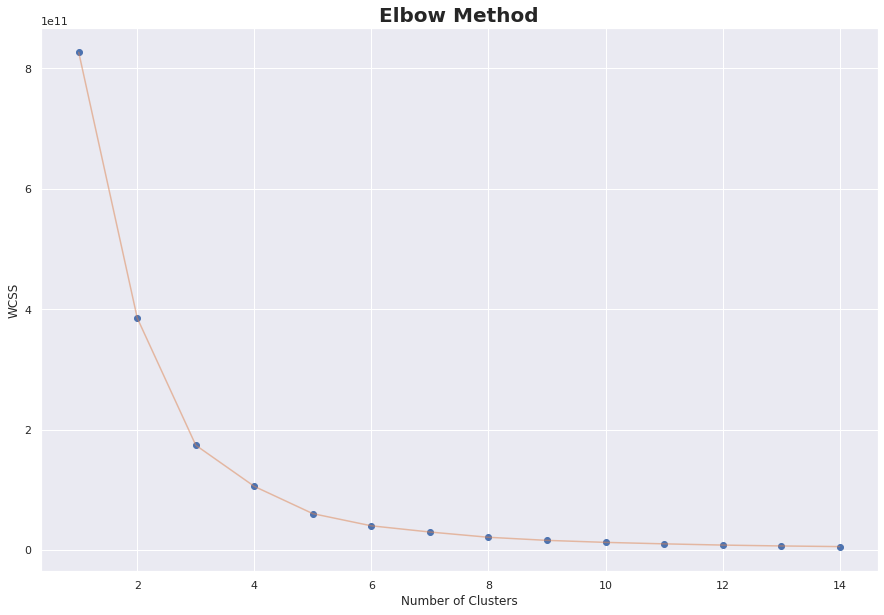

In [ ]:
# dados originais
wcss = []
for i in range(1,15):
  # instanciando o modelo
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # dando fit nos dados
  kmeans.fit(df_num)
  # salvando os resultados na lista
  wcss.append(kmeans.inertia_)

# plotando o Elbow Method  
plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method',fontsize=20,fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

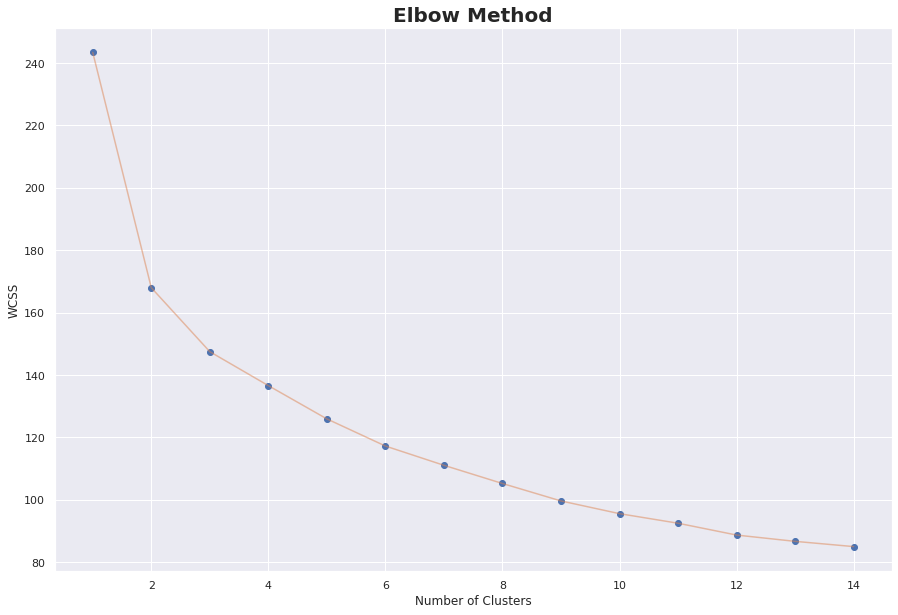

In [ ]:
# Dados Padronizados
wcss = []
for i in range(1,15):
  # instanciando o modelo
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # dando fit nos dados
  kmeans.fit(scaled)
  # salvando os resultados na lista
  wcss.append(kmeans.inertia_)
  
# plotando o Elbow Method  
plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method',fontsize=20,fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# verificar os resultados
print('Lista Com Erros: ', wcss)

Lista Com Erros:  [243.4104599482724, 168.0104336548395, 147.5040317325812, 136.62322505675823, 125.96295704040412, 117.26483036925296, 111.09150666430297, 105.25825515352484, 99.66442075003894, 95.59211087511277, 92.52623330897842, 88.73497072227917, 86.71495562578684, 85.03921117378374]


In [ ]:
# diferença entre os elementos
dif = np.diff(wcss)
print('Diferença Entre os Elementos: ', dif)

Diferença Entre os Elementos:  [-75.40002629 -20.50640192 -10.88080668 -10.66026802  -8.69812667
  -6.1733237   -5.83325151  -5.5938344   -4.07230987  -3.06587757
  -3.79126259  -2.0200151   -1.67574445]


Aparentemente, 6 é um bom número de Clusters.

Agora vamos instanciar o modelo que vamos usar, definindo o número correto de clusters, e vamos ver como nossos dados foram separados.

In [ ]:
scaled


,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.86,0.819364,0.506928,0.454545,0.545212,0.0,0.038116,0.252951,0.000011,0.168483,0.903137,0.690948,0.086668,0.75
1,0.85,0.578035,0.729792,0.363636,0.706076,1.0,0.035657,0.059682,0.000000,0.975086,0.657677,0.508160,0.075697,0.75
2,0.85,0.660405,0.841801,0.909091,0.780177,0.0,0.062462,0.428185,0.000000,0.095816,0.870116,0.658797,0.161742,0.75
3,0.84,0.553468,0.789838,0.000000,0.637684,0.0,0.174966,0.074438,0.000000,0.374027,0.591635,0.902084,0.178135,0.75
4,0.84,0.380058,0.876443,1.000000,0.787439,1.0,0.070577,0.243728,0.000000,0.325236,0.719318,0.677181,0.150162,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.68,0.832370,0.508083,0.090909,0.432011,0.0,0.211853,0.621864,0.000863,0.344960,0.838195,0.211193,0.104096,0.75
296,0.68,0.713873,0.644342,0.090909,0.447217,0.0,0.039100,0.177119,0.000000,0.127998,0.660980,0.210981,0.183106,0.75
297,0.60,0.325145,0.206697,0.000000,0.118290,1.0,0.004303,0.862682,0.000331,0.141493,0.135938,0.103028,0.229338,0.75
298,0.60,0.420520,0.046189,0.272727,0.000000,1.0,0.004795,0.990777,0.066667,0.110350,0.170061,0.707300,0.106200,0.75


In [ ]:
# instanciando o modelo
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

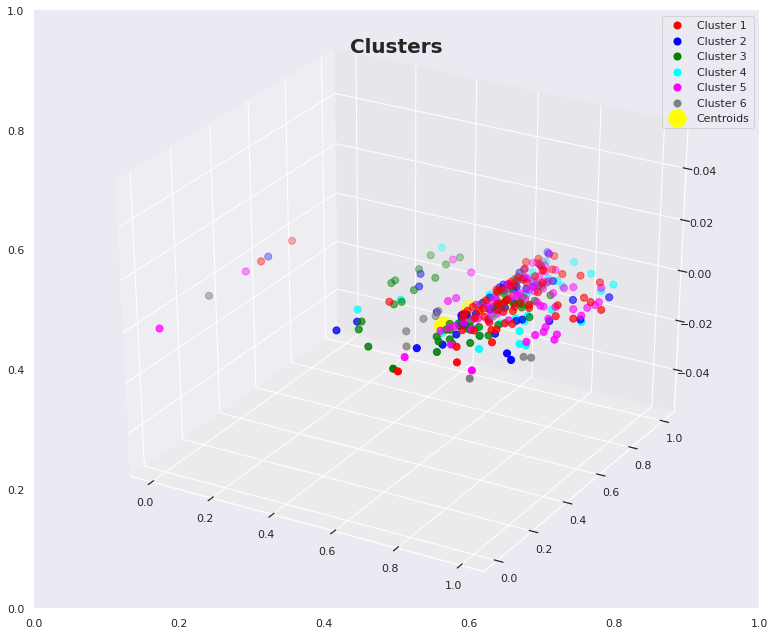

In [ ]:
# visualizando os clusters
fig, ax = plt.subplots(figsize=(13,11))
scaled = scaler.fit_transform(df_num)
# definindo a figura em 3 dimensões
ax = fig.add_subplot(111, projection='3d')
# plotando os clusters
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1],  s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters',fontsize=20,fontweight='bold')
plt.legend()
plt.show()

## Visualizar Os Clusters

In [ ]:
# visualizando as previsões
y_kmeans

array([4, 2, 4, 1, 0, 4, 0, 1, 3, 3, 2, 4, 1, 0, 0, 0, 3, 4, 2, 2, 0, 0,
       0, 2, 4, 3, 2, 2, 3, 3, 2, 2, 0, 0, 1, 2, 3, 0, 0, 0, 2, 4, 2, 4,
       3, 2, 3, 0, 4, 2, 2, 3, 0, 0, 0, 3, 4, 3, 4, 4, 4, 4, 2, 1, 2, 1,
       4, 3, 1, 1, 3, 1, 5, 0, 5, 2, 4, 3, 4, 4, 1, 3, 0, 4, 2, 2, 0, 0,
       0, 4, 4, 3, 4, 2, 4, 4, 4, 2, 1, 4, 4, 0, 4, 0, 3, 2, 0, 3, 5, 2,
       2, 4, 0, 3, 4, 2, 4, 0, 1, 1, 0, 3, 1, 4, 0, 2, 0, 1, 1, 0, 2, 1,
       0, 3, 0, 4, 1, 1, 1, 4, 1, 4, 4, 4, 4, 3, 2, 4, 4, 4, 1, 3, 1, 1,
       0, 4, 3, 2, 3, 2, 1, 4, 3, 2, 2, 3, 2, 0, 4, 0, 1, 4, 2, 3, 0, 2,
       2, 3, 2, 3, 1, 2, 0, 0, 3, 1, 0, 4, 0, 4, 4, 2, 0, 0, 1, 3, 4, 2,
       3, 2, 0, 4, 4, 3, 0, 4, 5, 3, 2, 3, 2, 1, 2, 2, 4, 2, 0, 1, 0, 2,
       2, 4, 4, 4, 4, 1, 1, 2, 4, 1, 5, 0, 1, 3, 0, 2, 3, 1, 4, 0, 4, 0,
       3, 0, 1, 0, 3, 1, 4, 1, 4, 0, 0, 2, 2, 4, 1, 4, 1, 0, 4, 2, 0, 3,
       1, 4, 1, 0, 1, 1, 0, 5, 4, 3, 3, 4, 4, 3, 0, 4, 3, 1, 1, 5, 1, 4,
       4, 4, 4, 0, 1, 5, 5, 0, 4, 1, 1, 5, 5, 0], d

In [ ]:
# convertendo as previsões para um dataframe
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['cluster']

# previsões como um df
print(kmeans.shape)
kmeans.head()

(300, 1)


,cluster
0,4
1,2
2,4
3,1
4,0


In [ ]:
# concatenando os clusters 
df = pd.concat([df, kmeans], axis=1)

# conferindo os dataframes
print(df.shape)
df.head()

(300, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4,2
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4,1
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4,0


In [ ]:
# checando valores nulos
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

artist_name         0.0
track_name          0.0
time_signature      0.0
duration_ms         0.0
tempo               0.0
valence             0.0
liveness            0.0
instrumentalness    0.0
acousticness        0.0
speechiness         0.0
mode                0.0
loudness            0.0
key                 0.0
energy              0.0
danceability        0.0
popularity          0.0
track_id            0.0
cluster             0.0
dtype: float64

In [ ]:
# média de popularidade por cluster
df.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
3    76.086957
4    75.053333
0    73.396825
1    71.000000
2    67.888889
5    67.090909
Name: popularity, dtype: float64

In [ ]:
# conferindo o número de músicas por cluster
df['cluster'].value_counts()

4    75
0    63
2    54
1    51
3    46
5    11
Name: cluster, dtype: int64

In [ ]:
# checando as músicas no cluster
df.loc[df['cluster'] == 3][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
8,Anitta,Combatchy (feat. MC Rebecca),2bPtwnrpFNEe8N7Q85kLHw,83,0.826,0.730,1,-3.032,1,0.0809,0.38300,0.000374,0.0197,0.605,150.134,157600,4,3
9,Zé Neto & Cristiano,Ferida Curada,1U3tv41tFRgOfbytpuYQrR,83,0.490,0.845,2,-3.359,1,0.0973,0.49000,0.000000,0.2130,0.548,146.105,159164,4,3
16,Luan Santana,quando a bad bater - ao vivo,1nVIlX3h3Ds9bH6JMQopIU,82,0.647,0.787,1,-4.767,1,0.0413,0.30700,0.000000,0.5320,0.535,128.121,179722,4,3
25,Marília Mendonça,Todo Mundo Vai Sofrer - Ao Vivo,4E6RdcCWMiHTu7zy1VTNDo,81,0.621,0.743,3,-3.864,1,0.0738,0.28100,0.000000,0.4110,0.581,111.454,154661,4,3
28,Dj Guuga,Vidrado Em Você,2kOmW169C7UV4SZDN9u0YO,80,0.843,0.925,2,0.302,1,0.0997,0.13900,0.000008,0.1090,0.590,159.926,134769,4,3
29,Yasmin Santos,"Para, Pensa e Volta - Ao Vivo",2KyXyTrp3kp1Fsg7B1osYD,80,0.611,0.791,2,-3.095,1,0.0436,0.24500,0.000000,0.2370,0.572,111.928,174179,4,3
36,Melim,Gelo,0J6cINt02c8UQqDG7vLShY,79,0.542,0.563,0,-7.446,1,0.0958,0.24200,0.000000,0.1090,0.897,169.909,149728,4,3
44,MC Doni,Te Amo Sem Compromisso,4mkagJJ8AM1hzeyrgAJc3x,78,0.940,0.711,3,-3.975,1,0.1910,0.00369,0.000117,0.0765,0.693,130.000,132923,4,3
46,Y2K,Lalala,51Fjme0JiitpyXKuyQiCDo,94,0.843,0.391,2,-7.899,1,0.0845,0.18100,0.000000,0.1370,0.496,129.972,160627,4,3
51,Zé Neto & Cristiano,Estado Decadente - Acústico,4eB8rsNNm5791m3uvEBNLR,77,0.757,0.687,1,-4.780,1,0.0658,0.58600,0.000000,0.1110,0.583,117.927,173831,4,3
